In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('dataset_einstein.csv', delimiter=';')
df.describe()

,Patient age quantile,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.020000e+02,6.020000e+02,5.060000e+02,4.240000e+02
mean,9.318391,0.013997,0.008859,0.007264,-1.598342e-08,6.218887e-09,-6.594684e-09,2.760870e-09,-6.669811e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000832e+00,1.000832e+00,1.000990e+00,1.001181e+00
min,0.000000,0.000000,0.000000,0.000000,-4.345603e+00,-2.020303e+00,-1.140144e+00,-5.353622e-01,-2.389999e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.862439e-01,-6.372547e-01,-5.292256e-01,-5.135051e-01,-6.324890e-01
50%,9.000000,0.000000,0.000000,0.000000,4.031596e-02,-2.128790e-01,-2.237665e-01,-3.942844e-01,-8.111328e-02
75%,14.000000,0.000000,0.000000,0.000000,7.295320e-01,4.542955e-01,3.871516e-01,3.242637e-02,5.133384e-01
max,19.000000,1.000000,1.000000,1.000000,2.671868e+00,4.522042e+00,1.107822e+01,8.026671e+00,5.053572e+00


In [14]:
print(df.shape[0], 'rows x', df.shape[1], 'columns') # 5644 rows x 11 columns

df = df.dropna() # dropando registros com dados faltantes

print(df.shape[0], 'rows x', df.shape[1], 'columns') # 357 rows x 11 columns

print('\nRegistros NEG: ', df[df['SARS-Cov-2 exam result'] == 'negative'].shape[0]) # 302 negativos
print('Registros POS: ', df[df['SARS-Cov-2 exam result'] == 'positive'].shape[0]) # 55 positivos

5644 rows x 11 columns
357 rows x 11 columns

Registros NEG:  302
Registros POS:  55


In [15]:
df.head(5)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
1,126e9dd13932f68,17,negative,0,0,0,-0.022340,-0.094610,-0.223767,-0.147895,2.089928
8,8bb9d64f0215244,1,negative,0,1,0,-0.774212,0.364550,-0.223767,-0.286986,-1.838623
28,fc41531ca4faf1e,13,negative,0,0,0,0.854844,-0.075131,2.525365,-0.434025,-0.701411
29,891d0f6449ff3d7,14,negative,0,0,0,0.854844,0.105751,-0.529226,-0.529401,0.332418
30,ebdd7c67fcb21b4,9,negative,1,0,0,-0.711556,-0.286623,-0.223767,0.545572,1.021638


- Variável alvo (**target**): `SARS-Cov-2 exam result`, que representa o resultado do exame para detecção do vírus SARS-CoV-2.
  
- Variáveis preditoras (**features**): Serão utilizadas as variáveis laboratoriais `Hemoglobin`, `Leukocytes`, `Basophilis`. `Proteina C reativa mg/dL` e `Creatinine` para features de entrada do modelo.

In [ ]:
# df -> array Numpy
Y = df['SARS-Cov-2 exam result'].values
print(Y)

['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negat

In [ ]:
X = df[['Hemoglobin', 'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL']].values
print(X)

[[-0.02234027 -0.09461035 -0.22376651 -0.14789495]
 [-0.774212    0.36455047 -0.22376651 -0.28698576]
 [ 0.85484386 -0.07513076  2.52536511 -0.4340246 ]
 ...
 [ 1.10546756 -0.5509882  -0.22376651  0.5614683 ]
 [-2.77920342 -1.73367476 -1.14014375  0.60915661]
 [ 0.54156393 -1.28842807 -1.14014375 -0.50357002]]


In [18]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [19]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Algoritmo para gerar o Modelo
tree_algoritmo = DecisionTreeClassifier(criterion='entropy', max_depth=5) # estratégia de entropia e altura maxima

# Treinando o Modelo
tree_model = tree_algoritmo.fit(X_train, y_train)

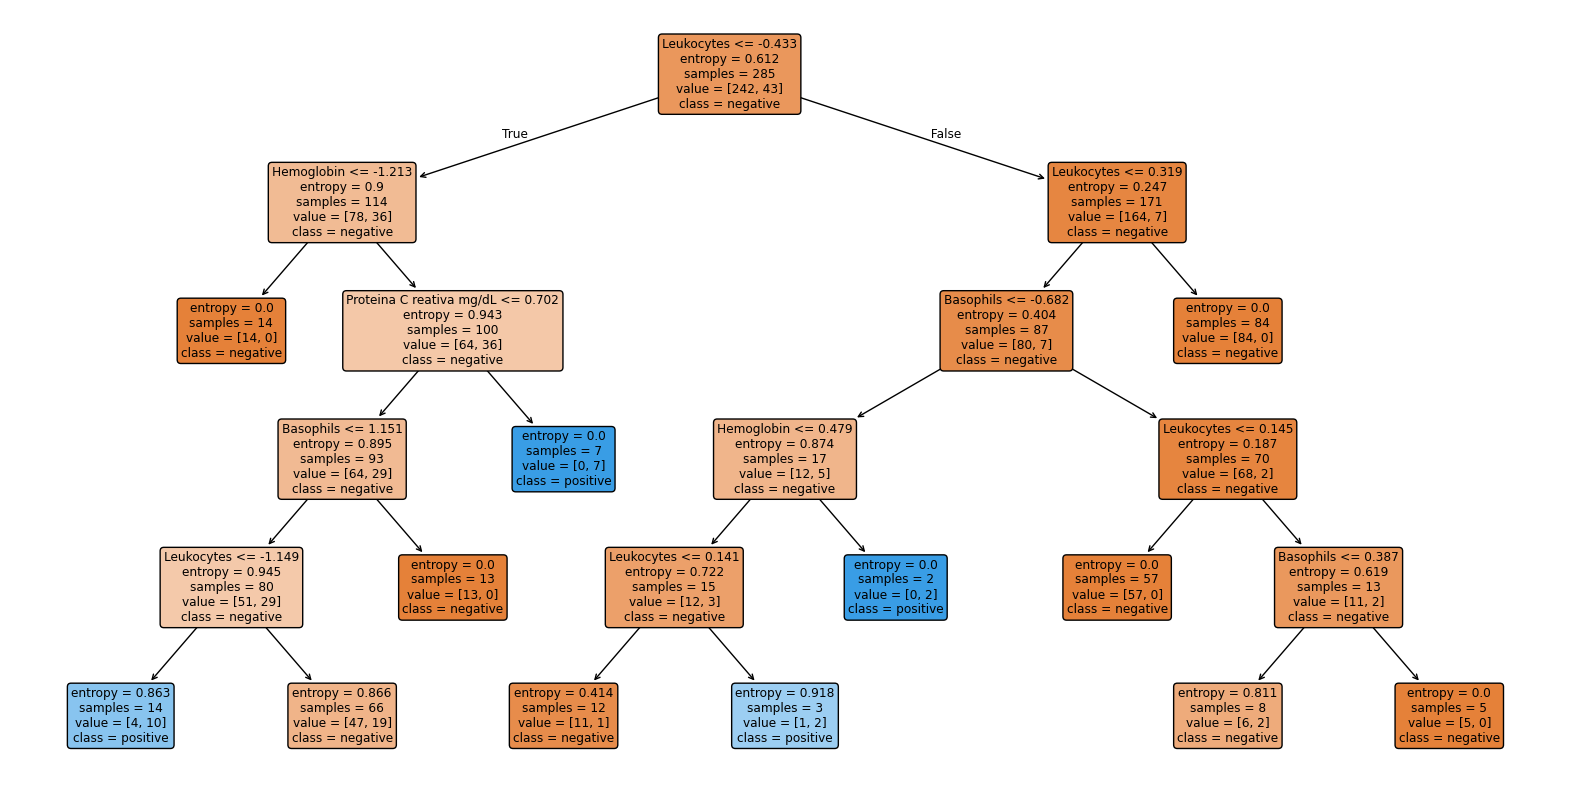

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

nome_features = ['Hemoglobin', 'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL']
nome_classes = ['negative', 'positive']

plt.figure(figsize=(20, 10))
plot_tree(tree_model, 
          feature_names=nome_features, 
          class_names=nome_classes, 
          filled=True, rounded=True)
plt.show()

Feature Ranking:
1. Feature Leukocytes (Importance: 0.563066)
2. Feature Basophils (Importance: 0.180404)
3. Feature Hemoglobin (Importance: 0.135537)
4. Feature Proteina C reativa mg/dL (Importance: 0.120993)


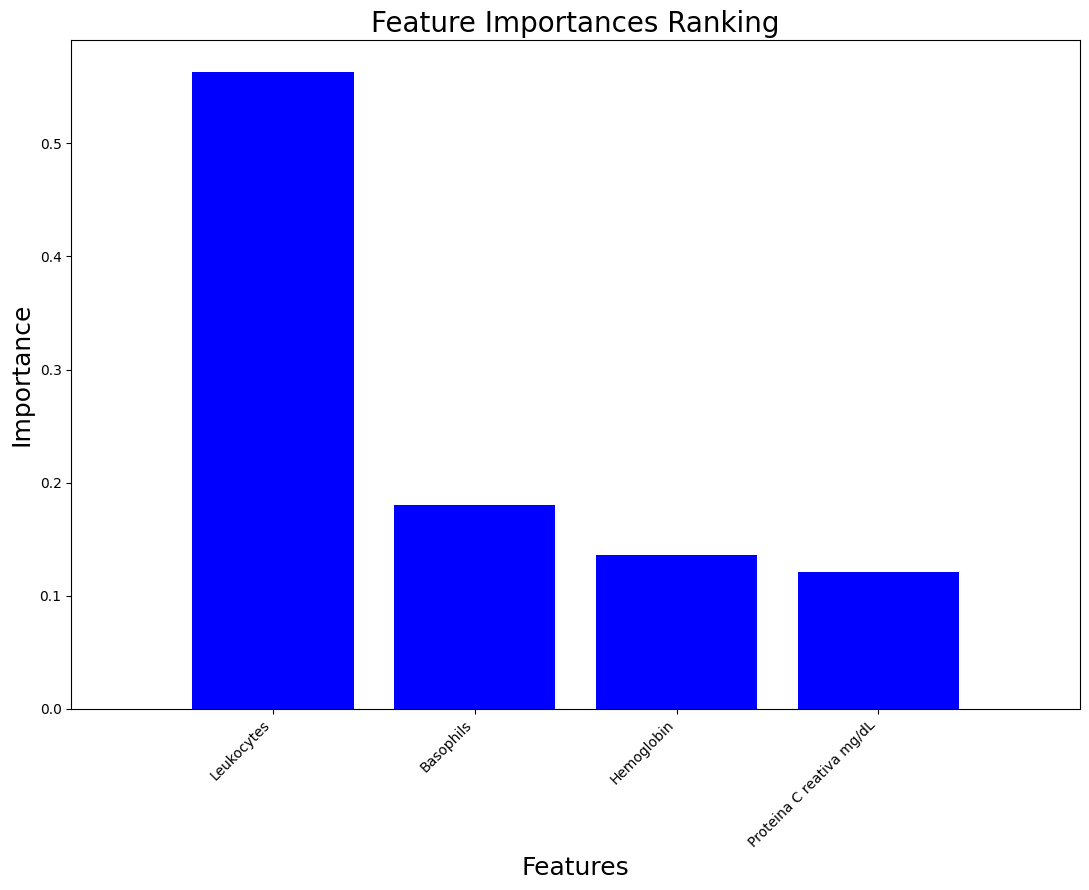

In [21]:
importances = tree_model.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = ['Hemoglobin', 'Leukocytes', 'Basophils', 'Proteina C reativa mg/dL']

print("Feature Ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {feature_names[indices[f]]} (Importance: {importances[indices[f]]:.6f})")

f, ax = plt.subplots(figsize=(11, 9))
ax.set_title("Feature Importances Ranking", fontsize=20)
ax.bar(range(X.shape[1]), importances[indices], color="b", align="center")
ax.set_xticks(range(X.shape[1]))
ax.set_xticklabels([feature_names[i] for i in indices], rotation=45, ha="right")
ax.set_xlim([-1, X.shape[1]])

ax.set_ylabel("Importance", fontsize=18)
ax.set_xlabel("Features", fontsize=18)

plt.tight_layout() 
plt.show()


## Teste e Avaliação

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Teste
y_predict = tree_model.predict(X_test)

# Avaliação
print("Acurácia: ", accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Acurácia:  0.8472222222222222
              precision    recall  f1-score   support

    negative       0.87      0.97      0.91        60
    positive       0.60      0.25      0.35        12

    accuracy                           0.85        72
   macro avg       0.73      0.61      0.63        72
weighted avg       0.82      0.85      0.82        72



Matriz de Confusão sem normalizacão 
[[58  2]
 [ 9  3]]


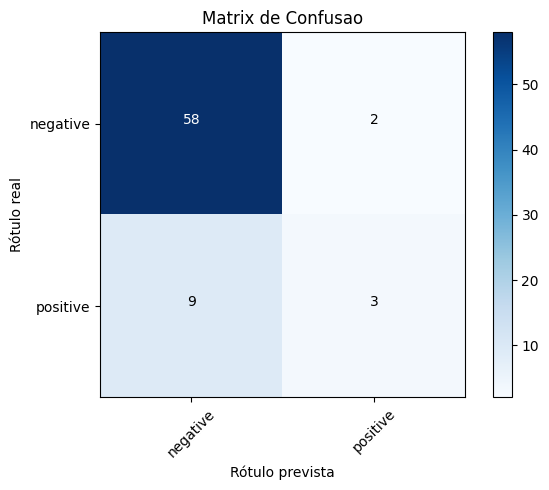

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão sem normalizacão ')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo real')
    plt.xlabel('Rótulo prevista')

matrix_confusao = confusion_matrix(y_test, y_predict)
plt.figure()
plot_confusion_matrix(matrix_confusao, classes=nome_classes,
                      title='Matrix de Confusao')
